In [12]:
import pandas as pd
df = pd.read_excel('/home/ubuntu/test5.xlsx')
beta = pd.read_excel('/home/ubuntu/cluster_female.xlsx')
beta['train'] = beta['train'].fillna(0)
beta = beta.dropna()
#print(beta)
#beta = beta.drop(['race', 'expression', 'age', 'gender'], axis=1)
#beta['asian']=beta['eastasian']+beta['southeasian']
#beta = beta[['path', 'attractive', 'attr_female', 
#             'female', 'age_10', 'age_30', 'white', 'indian',
#            'hispanic', 'asian', 'black', 'wavy hair', 'skin',
#             'blond hair', 'face quality', 'happiness']]

#remove raters with less than 50 images 
min_number= len(df)-50
df3 = df.loc[:, (df.isnull().sum(axis=0) <= min_number)]
df3= df3[df3['path'].notna()]
from sklearn.utils import shuffle
df3 = shuffle(df3)
import numpy
#calculate a mean for every class

from sklearn.metrics import accuracy_score
from scipy.stats import pearsonr
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from scipy import spatial
from scipy.spatial import distance


    
#create score, features test and train sets
import cv2
import numpy
from pathlib import Path
from scipy.stats import pearsonr
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.linear_model import BayesianRidge



#clf = svm.SVR(kernel='rbf',epsilon=0.001)
clf=svm.SVR(kernel='linear')
#clf = BayesianRidge()


n=0
sum_PC=0
sum_RMSE=0
sum_MAE=0
cv = KFold(n_splits=10, random_state=1, shuffle=True)
for column in df3:
   x=[]
   y=[]
   x_test=[]
   y_test=[]
    
   if ('path' not in column) and ('mean' not in column) and ('image' not in column)and ('Unnamed: 2' not in column)and ('Unnamed: 0' not in column):
        print(column) 
       # feature_list=beta.drop(['path'], axis=1).columns
        #print(feature_list[1])
        PC_user=0
        n_user=0
        for index, row in df3.iterrows():

            score=row[column]
            if numpy.isnan(score):
               score= numpy.nan_to_num(score)
            #score=round(score)
           # print(score)
            
            if score!=0 and row['path']!='':
                f=row['path']
                
                f=f.replace('/home/ubuntu/ECUST_FBP/images','/home/ubuntu/ME-beautydatabase/images') 
               # f=f.replace('.jpg','.txt')
                
                #print(f)
                beta_features = beta[beta['path'].str.contains(f)]
                #print(beta_features)
               # file = Path(f)
                if beta_features.empty==False:
                    
                     if int(beta_features['train'])==1:
                           beta_features = beta_features.drop(['path','train','cluster'], axis=1) 
                           descriptor = beta_features.values 
                           x.append(descriptor)  
                           y.append(score)
                     else:
                           beta_features = beta_features.drop(['path','train','cluster'], axis=1) 
                           descriptor = beta_features.values 
                           x_test.append(descriptor)  
                           y_test.append(score)
            #except:
        
        #print(x0) 
        x=numpy.array(x) 
        x=x.squeeze()
        print(x.shape)
        y=numpy.array(y)
        print(y.shape)
        
        x_test=numpy.array(x_test) 
        x_test=x_test.squeeze()
        print(x_test.shape)
        y_test=numpy.array(y_test)
        print(y_test.shape)
           
       
        
        if len(x)>10: 
           
         if len(x_test)>15:
            # x, x_test, y, y_test=train_test_split(x0, y0, test_size=test_share, shuffle=True)
            # print(y)
             #n_components = 25
             #pca = PCA(n_components=n_components, whiten=True).fit(x)
 
             # apply PCA transformation
             #x = pca.transform(x)
             #x_test = pca.transform(x_test)
             clf.fit(x,y)
             arr=clf.coef_
             b=clf.intercept_
            
             #arr=arr.squeeze()
             #sorted_index_array = numpy.argsort(arr)
             #sorted_array = arr[sorted_index_array]
             #rslt = sorted_array[-8 : ]
             #u=0
             #for item in sorted_index_array:
                 # if u<8:
              #      print(feature_list[item])
                 #   u=u+1
             
             #print('dot   ', numpy.dot(x_test[5].squeeze(),arr.squeeze())+b)
            
             res = clf.predict(x_test) 


             j=0
             while j<len(res):
                    print(res[j], y_test[j])
                    j=j+1 
            # a = accuracy_score(res, y_test)
             PC= pearsonr(res, y_test)[0]
             print(PC)
             RMSE = mean_squared_error(res, y_test)
             MAE = mean_absolute_error(res, y_test)
             n_user=n_user+1
             n=n+1   
             PC_user=PC_user + PC
             sum_PC = sum_PC + PC
             sum_MAE = sum_MAE + MAE
             sum_RMSE = sum_RMSE + RMSE
                
         print(column, PC_user/n_user)
print('result', sum_PC/n, sum_MAE/n, sum_RMSE/n)


cm39
(9, 15)
(9,)
(501, 15)
(501,)
cf41
(11, 15)
(11,)
(609, 15)
(609,)
8.462631811644897 6.0
7.128010708256091 5.0
7.716630265522003 9.0
5.868056770596546 5.0
6.9649234672249 5.0
7.356057050479448 7.0
6.452083892285487 7.0
5.99037326024558 3.0
7.072010151289451 5.0
7.486204993257371 8.0
8.338510203183304 7.0
6.774404166835021 9.0
7.783741106054808 8.0
6.919411427515662 8.0
6.363278427688357 5.0
5.519667875297436 8.0
5.647095669043874 7.0
7.5627117170244285 5.0
6.089335175517009 6.0
7.295720551883004 6.0
7.083115549185526 8.0
7.061673581095389 7.0
6.639437852441316 7.0
6.418882357815438 6.0
6.30476219956763 7.0
7.536864211843335 4.0
6.878233423534607 6.0
6.36075732855671 7.0
7.515436049039537 8.0
6.873226700762096 7.0
6.775968735202945 5.0
7.482109007322791 5.0
7.225556438879441 8.0
5.671030935172837 6.0
5.4959672852604635 6.0
6.7281891830466325 6.0
5.944551574447655 7.0
6.466994807327752 8.0
6.315322794691046 5.0
7.807081993048707 8.0
7.192508756127253 8.0
5.799032095353292 6.0
7.0478

(11, 15)
(11,)
(522, 15)
(522,)
6.151550818145053 5.0
7.055066914025987 5.0
4.552324989833366 5.0
6.007309918671485 9.0
4.753672244373091 5.0
4.781577345528489 5.0
6.290421032911286 5.0
7.197220278159756 4.0
4.718511439602553 6.0
5.279890328513237 4.0
3.6550290632210904 5.0
6.433513738235302 6.0
6.351613098697121 5.0
6.12890922869206 5.0
5.567401865598671 5.0
5.719786551651948 3.0
4.904936301390343 4.0
3.9628194465257174 4.0
6.277469317748941 7.0
4.269749909949018 5.0
6.464322335739605 6.0
5.647672832973754 5.0
6.701784622174165 6.0
4.0514214427104145 1.0
4.060837305641845 3.0
4.528059780762074 5.0
6.593130527266157 7.0
4.213507583670911 4.0
6.350145322401681 6.0
6.876447677313363 6.0
4.130390383190751 5.0
6.425987735298068 6.0
6.296338442312806 4.0
2.8757002283706923 4.0
4.748103993375768 4.0
5.023924925972725 4.0
3.7064311427269 5.0
6.253216756578104 5.0
4.592008569073121 3.0
3.9996540115596244 4.0
3.5366642439354212 4.0
6.690642910278383 8.0
4.450208759013608 6.0
6.444751733762978 4

(9, 15)
(9,)
(539, 15)
(539,)
cf34_2
(0,)
(0,)
(92, 15)
(92,)
cf34
(12, 15)
(12,)
(601, 15)
(601,)
9.46177099368824 8.0
8.954426575739435 7.0
7.3598699778567624 8.0
7.324353215241278 9.0
8.532784676155156 8.0
7.418411650156576 5.0
7.529930633175028 9.0
8.216589111674239 9.0
8.97294549828602 8.0
7.404739208121843 8.0
8.759758287816137 7.0
6.107386144337449 7.0
8.476142265200282 9.0
8.283478557315076 9.0
8.157610413856176 7.0
7.184473481892942 8.0
5.968847576020995 6.0
8.033664613070382 7.0
7.58677990372056 8.0
6.871271501807522 6.0
8.23762415337062 6.0
7.091894479062491 6.0
7.819824679097168 6.0
7.282720578280721 8.0
7.757107174258747 8.0
8.155852828763921 7.0
8.739579691862218 8.0
6.8997494412864615 1.0
7.078425831512239 3.0
7.303071087298286 8.0
8.5363655103624 9.0
7.172020794033154 5.0
8.867111365560872 9.0
7.35410140082296 5.0
6.877411138583058 6.0
7.616134600679995 9.0
8.123748818988467 6.0
5.558395048550002 2.0
7.510138803805569 8.0
6.796348241236183 7.0
6.6006910067224265 6.0
7.8

(6, 15)
(6,)
(296, 15)
(296,)
cf25
(11, 15)
(11,)
(523, 15)
(523,)
6.68343892369442 9.0
6.562628078197843 5.0
5.669146002504593 3.0
3.8701778205780624 8.0
6.110926413164424 6.0
5.994636888214765 5.0
5.732963764209387 2.0
6.315632201574928 4.0
6.523799358104366 4.0
5.7285379137816586 9.0
6.479924990412018 5.0
3.62499738299714 2.0
6.171265518442231 8.0
5.058927779970373 8.0
6.2449878785273265 3.0
4.026751105780369 4.0
3.504935638160575 5.0
5.77416331347649 3.0
5.33041279805392 3.0
6.0838993075638275 5.0
5.414671148569676 7.0
5.71465922724502 5.0
4.420106918797618 5.0
6.544869910131139 8.0
5.218061306075736 1.0
5.453602159698434 2.0
6.514261425809961 9.0
5.521631990641675 2.0
4.714543609422569 4.0
4.283530783942664 8.0
3.834125510827329 3.0
4.721767754472541 5.0
5.702956646354387 4.0
2.866273664169693 3.0
6.2593474005147485 8.0
3.938260338855185 4.0
4.771794984882003 8.0
4.076774665906973 1.0
5.747436608060243 2.0
4.940059482463992 8.0
6.280138171566059 6.0
5.01878872176491 2.0
5.40146517

(12, 15)
(12,)
(541, 15)
(541,)
6.683196017439746 4.0
6.441265269772621 6.0
5.012480572800319 3.0
4.039439707031823 6.0
5.9573888631950815 8.0
4.141501542417794 4.0
5.345785536009323 5.0
6.285154651668321 7.0
4.852100470663182 4.0
6.12959349526024 6.0
3.9446938160466773 4.0
6.192258068177738 7.0
5.871217433966619 4.0
5.23691456224485 5.0
3.486351320404782 6.0
5.471921724265602 5.0
5.248304193837525 4.0
4.708944997491114 5.0
4.232944462469004 4.0
5.9085313688010945 4.0
5.288844564678813 3.0
5.628343786008518 5.0
5.758299963586757 3.0
6.479261576858081 6.0
3.6242022354880126 4.0
4.849460670739109 3.0
6.30433010892276 6.0
4.874056660027183 3.0
6.519090089518342 8.0
4.815649544619196 3.0
4.141116530930816 5.0
5.199234351539326 4.0
4.94788691941074 5.0
5.103796372383528 4.0
6.197105421275207 6.0
4.145752036627849 4.0
4.234611668324932 4.0
6.265733466561455 6.0
4.08774873233792 7.0
4.337180331113408 3.0
5.2734816256971895 4.0
3.822765498228622 5.0
6.070745334406727 7.0
3.938231525272612 3.0


(9, 15)
(9,)
(536, 15)
(536,)
A10042UW3Q59GF
(0,)
(0,)
(54, 15)
(54,)
A101U3FTZYY87V


/home/ubuntu/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/pandas/core/strings.py:2001: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


(2, 15)
(2,)
(96, 15)
(96,)
A10OFK6JCZFXQH
(3, 15)
(3,)
(56, 15)
(56,)
A10VX0V3HKGBIY
(15,)
(1,)
(23, 15)
(23,)


ValueError: Expected 2D array, got 1D array instead:
array=[0.31 0.73 1.   0.06 0.25 0.61 0.01 0.29 0.   0.   0.   0.   0.   0.18
 0.  ].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

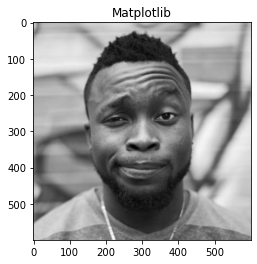

In [12]:
import matplotlib.pyplot as plt
import cv2
import numpy
x = cv2.imread('/home/ubuntu/face_images/10.jpg')
y = cv2.imread('/home/ubuntu/face_images/8.jpg')
gray = cv2.cvtColor(x, cv2.COLOR_BGR2GRAY)
x = numpy.array(cv2.resize(x, (224, 224)))
y = numpy.array(cv2.resize(y, (224, 224)))
plt.imshow(gray, cmap='gray')
plt.title('Matplotlib') #Give this plot a title, 
                        #so I know it's from matplotlib and not cv2
plt.show()

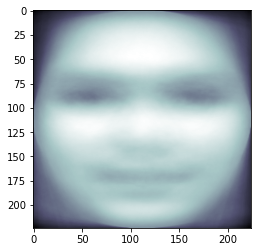

In [18]:
plt.imshow(pca.mean_.reshape(224,224),
           cmap=plt.cm.bone)

In [19]:
print(pca.components_.shape)

(100, 50176)


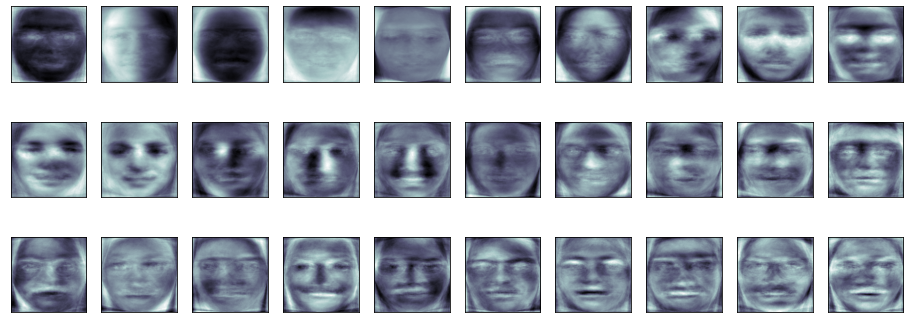

In [21]:
fig = plt.figure(figsize=(16, 6))
for i in range(30):
    ax = fig.add_subplot(3, 10, i + 1, xticks=[], yticks=[])
    ax.imshow(pca.components_[i].reshape(224,224),
              cmap=plt.cm.bone)

In [75]:
import pandas as pd
df = pd.read_excel('/home/ubuntu/test5.xlsx')
df

,mean,image,Unnamed: 2,Unnamed: 0,cm39,cf41,af48,hm23,cf34_2,cf34,...,AX7QB1F1M1IDO,AXKHNWMKGT751,AXMPSUNKUBEIL,AXMQBHHU22TSP,AY0758IITCGOZ,AY7RI824FORAE,AYBFVMPV70TDP,AYDHJW4ZG0D38,AZD9Z5B2U40G2,path
0,1.117647,kuma-kum-GKbPbR0ZAT4-unsplash.jpg,30,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,pexels-cottonbro-5529905.jpg,32,32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000,pexels-nishant-aneja-2561432.jpg,33,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.428571,woman-1929550_1920.jpg,34,34,1.0,1.0,2.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.500000,pexels-himesh-mehta-3059930.jpg,35,35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,9.000000,pexels-pixabay-247322.jpg,2638,2638,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/caucasian...
2603,9.375000,women-5930352_1920.jpg,2639,2639,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/asian/wom...
2604,9.222222,francesca-zama-1fhl_kmbfAE-unsplash.jpg,2640,2640,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/hispanic/...
2605,9.625000,sofia--LNdco1UgNY-unsplash.jpg,2641,2641,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/caucasian...


In [78]:
min_number= len(df)-100
df3 = df.loc[:, (df.isnull().sum(axis=0) <= min_number)]
df3

,mean,image,Unnamed: 2,Unnamed: 0,cm39,cf41,af48,hm23,cf34_2,cf34,...,ATIGCUKIPNWG0,ATT0YNUQ0SYVA,AU6ONGTBVHUTW,AUKAQ17894HDP,AW8C7BLRB8CZG,AX7QB1F1M1IDO,AXMQBHHU22TSP,AY0758IITCGOZ,AY7RI824FORAE,path
0,1.117647,kuma-kum-GKbPbR0ZAT4-unsplash.jpg,30,30,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN
1,1.000000,pexels-cottonbro-5529905.jpg,32,32,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000,pexels-nishant-aneja-2561432.jpg,33,33,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.428571,woman-1929550_1920.jpg,34,34,1.0,1.0,2.0,1.0,NaN,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1.500000,pexels-himesh-mehta-3059930.jpg,35,35,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2602,9.000000,pexels-pixabay-247322.jpg,2638,2638,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/caucasian...
2603,9.375000,women-5930352_1920.jpg,2639,2639,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/asian/wom...
2604,9.222222,francesca-zama-1fhl_kmbfAE-unsplash.jpg,2640,2640,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/hispanic/...
2605,9.625000,sofia--LNdco1UgNY-unsplash.jpg,2641,2641,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,/home/ubuntu/ECUST_FBP/images/female/caucasian...


In [16]:
import pandas as pd
df=pd.read_excel('/home/ubuntu/all.xlsx')
df = df.dropna()
df

,path,male,female,age_10,age_20,age_30,age_40,white,black,mideastern,...,sideburns,straight hair,wavy hair,wearing earrings,wearing hat,wearing lipstick,wearing necklace,wearing necktie,yaw,young
0,/home/ubuntu/ME-beautydatabase/images/female/i...,0.00,1.00,0.03,0.90,0.07,0.00,0.02,0.00,0.03,...,0.00,0.01,0.00,0.44,0.0,0.43,0.00,0.00,0.0,0.77
2,/home/ubuntu/ME-beautydatabase/images/female/i...,0.00,1.00,0.00,0.00,0.01,0.11,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.05
3,/home/ubuntu/ME-beautydatabase/images/female/i...,0.00,1.00,0.04,0.70,0.25,0.01,0.00,0.00,0.00,...,0.00,0.25,0.00,0.00,0.0,0.12,0.00,0.00,0.0,0.38
4,/home/ubuntu/ME-beautydatabase/images/female/i...,0.00,1.00,0.20,0.77,0.02,0.00,0.00,0.05,0.00,...,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.50
5,/home/ubuntu/ME-beautydatabase/images/female/i...,0.00,1.00,0.14,0.85,0.01,0.00,0.15,0.00,0.13,...,0.00,0.00,0.51,0.21,0.0,0.92,0.22,0.00,0.0,0.34
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2526,/home/ubuntu/ME-beautydatabase/images/male/mid...,0.93,0.07,0.00,0.01,0.30,0.62,0.60,0.00,0.38,...,0.49,0.00,0.00,0.00,0.6,0.00,0.00,0.00,0.0,0.00
2527,/home/ubuntu/ME-beautydatabase/images/male/mid...,1.00,0.00,0.00,0.16,0.76,0.08,0.01,0.01,0.06,...,0.69,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.62
2528,/home/ubuntu/ME-beautydatabase/images/male/mid...,1.00,0.00,0.00,0.10,0.79,0.10,0.00,0.00,0.01,...,0.76,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.0,0.39
2529,/home/ubuntu/ME-beautydatabase/images/male/mid...,1.00,0.00,0.00,0.35,0.63,0.02,0.06,0.00,0.25,...,0.89,0.74,0.00,0.00,0.0,0.00,0.00,0.27,0.0,0.54
